In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow  as tf
import keras
from tqdm import tqdm
from collections import Counter
from tensorflow.keras import layers, Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
#Data Path
height=224
width=224
height=224
color_channels=3
image_size = (width, height, color_channels)
num_classes = 5 # Adjust based on your specific dataset
train_path=r'C:\Users\Fatma\OneDrive\Desktop\ML_PROJECT\archive (3)\Fruits Classification\TRAIN\train'
test_path=r'C:\Users\Fatma\OneDrive\Desktop\ML_PROJECT\archive (3)\Fruits Classification\TEST\test'
checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
final_model_path = '/content/training_1'

In [30]:
def read_images_from_directory(folder_path, desc):
    """
    Analyzes the sizes of JPEG images within each subfolder of the given directory.

    Parameters:
    - train_path: str. The path to the directory containing subfolders of images.
    - desc: str. A description for the tqdm progress bar.

    Returns:
    - A pandas Series object with the counts of each unique image size.
    """
    images = []
    labels=[]

    # Iterate through each folder in the given directory with a progress bar

    for folder in os.listdir(folder_path):
        files = gb.glob(pathname=str(folder_path + '/' + folder + '/*.jpeg'))

        # For each file in the current folder, read the image and append its size
        for file in tqdm(files, desc=desc+" in "+folder):
            image = plt.imread(file)
            img_resized=cv2.resize(image,(width,height))
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img_rgb)
            labels.append(folder)


    # Count the occurrence of each unique size
    return images,labels

In [31]:
x_train,y_train= read_images_from_directory(train_path, "Loading Training Data")

Loading Training Data in Strawberry: 100%|██████████| 1400/1400 [00:16<00:00, 83.56it/s]


In [32]:
x_test,y_test= read_images_from_directory(test_path, "Loading Testing Data")

Loading Testing Data in Strawberry: 100%|██████████| 300/300 [00:03<00:00, 77.67it/s]


In [33]:
def visualize_data(list_of_images,labels):
  plt.figure(figsize=(20,20))
  for n,i in enumerate(list(np.random.randint(0,len(list_of_images),36))):
      plt.subplot(6,6,n+1)
      plt.imshow(list_of_images[i])
      plt.axis('off')
      plt.title(labels[i])

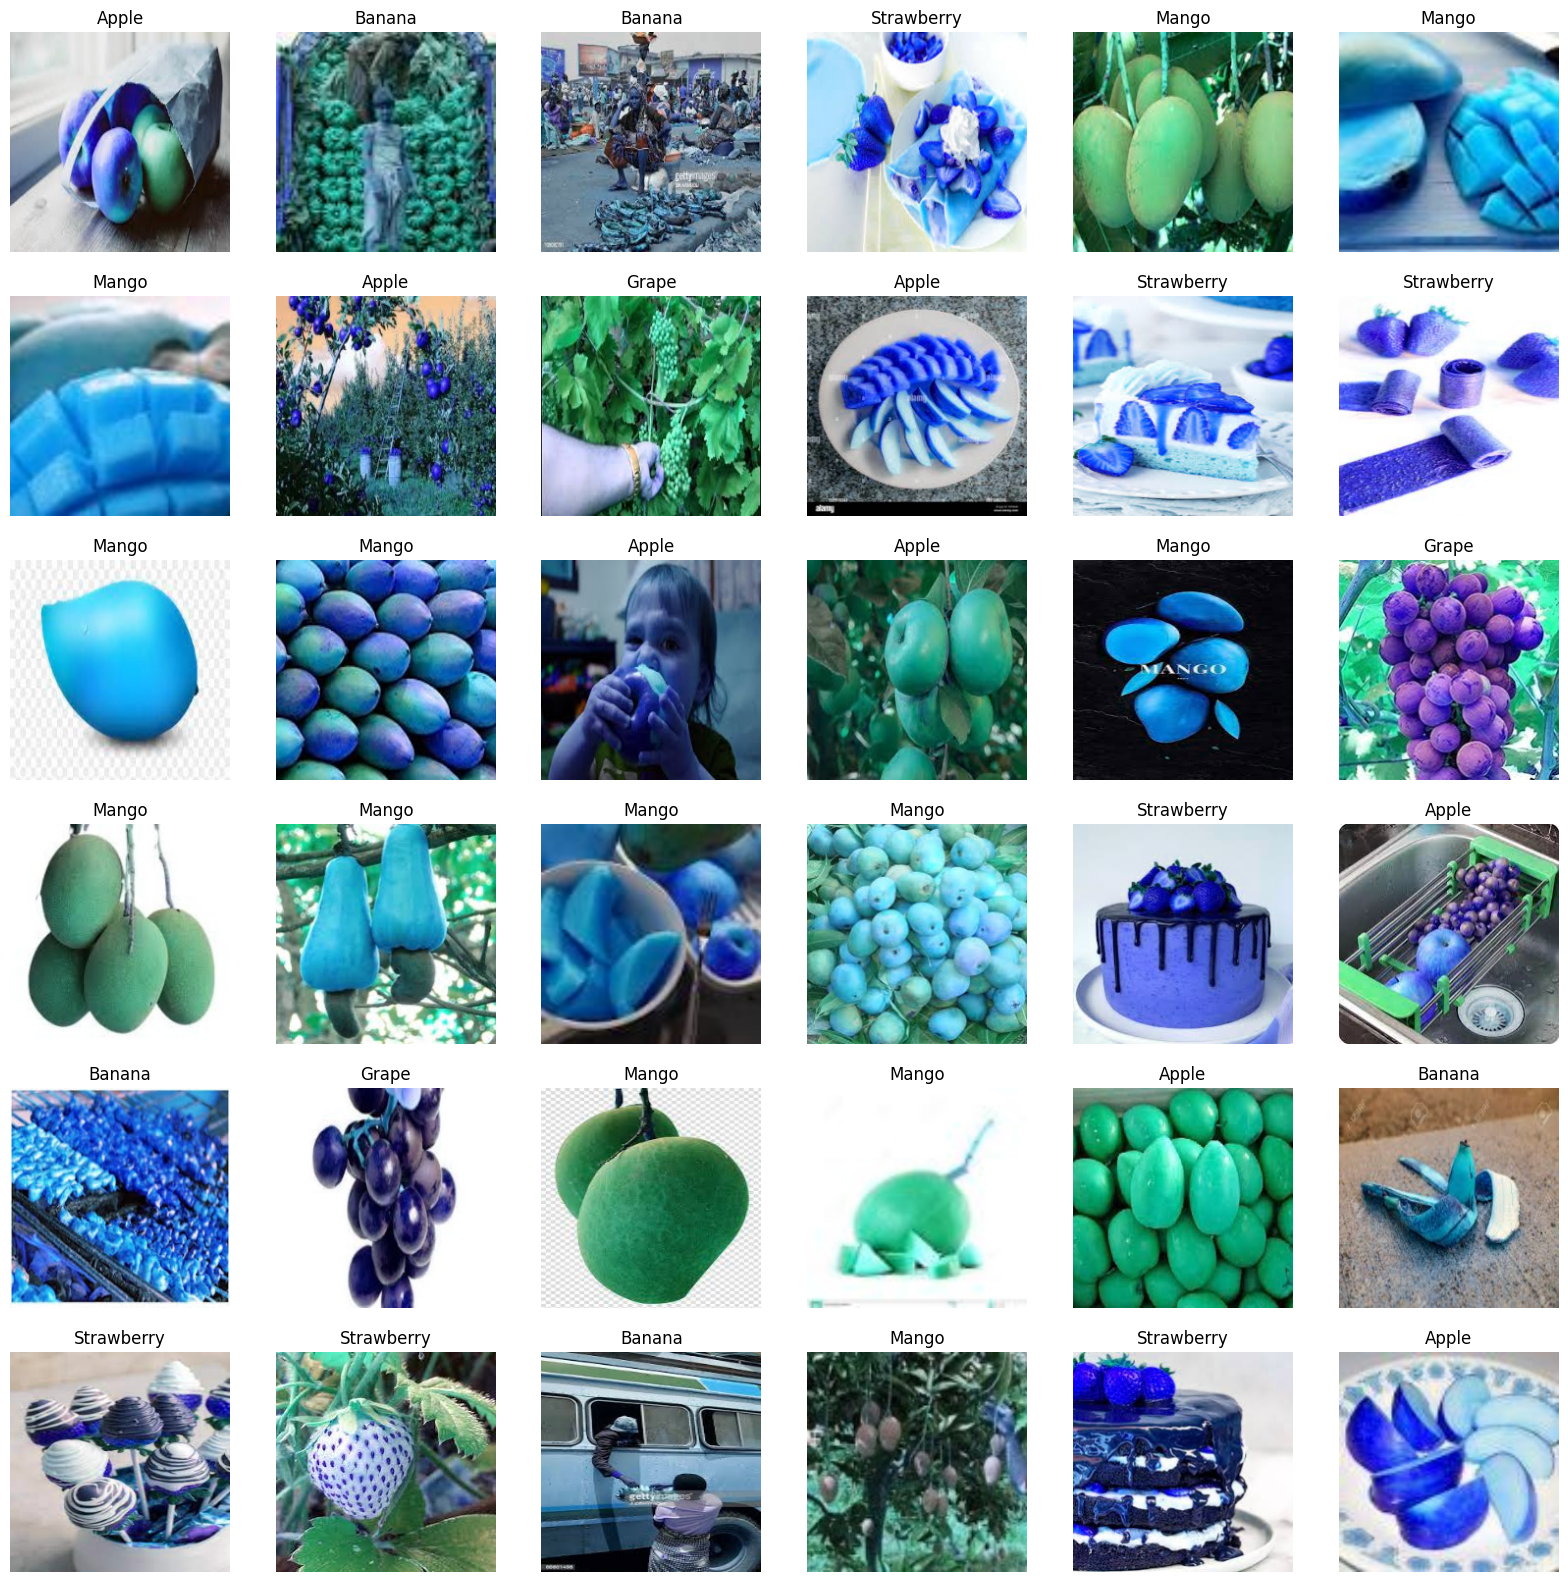

In [34]:
visualize_data(x_train,y_train)

In [35]:

def visualize_class_distribution(y_train, y_test):
    """
    Visualizes the class distribution in training and testing datasets when the labels are provided as lists.
    Adds a numeric label at the top of each bar showing the count.

    Parameters:
    - y_train: List of training labels.
    - y_test: List of testing labels.
    """
    train_counter = Counter(y_train)
    test_counter = Counter(y_test)

    all_labels = list(set(train_counter.keys()).union(set(test_counter.keys())))
    all_labels.sort()  # Sort the labels for consistent plotting
    train_counts = [train_counter[label] for label in all_labels]
    test_counts = [test_counter[label] for label in all_labels]

    x = range(len(all_labels))  # Label locations

    fig, ax = plt.subplots()
    train_bars = ax.bar([i - 0.2 for i in x], train_counts, width=0.4, label='Train', align='center')
    test_bars = ax.bar([i + 0.2 for i in x], test_counts, width=0.4, label='Test', align='center')

    ax.set_ylabel('Counts')
    ax.set_title('Class distribution in training and testing datasets')
    ax.set_xticks(x)
    ax.set_xticklabels(all_labels, rotation='horizontal')
    ax.legend()

    def autolabel(bars):
        """Attach a text label above each bar displaying its height."""
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 1),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(train_bars)
    autolabel(test_bars)

    plt.tight_layout()
    plt.show()


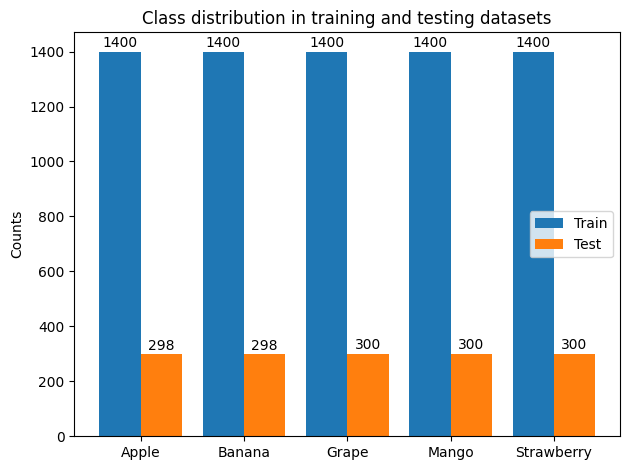

In [36]:
visualize_class_distribution(y_train, y_test)

In [37]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7000, 224, 224, 3)
X_test shape  is (1496, 224, 224, 3)
y_train shape  is (7000,)
y_test shape  is (1496,)


In [38]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [39]:
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

Found 5600 images belonging to 5 classes.
Found 1400 images belonging to 5 classes.


c:\Users\Fatma\anaconda3\envs\image_classifier_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.7324 - loss: 0.7791 - val_accuracy: 0.8946 - val_loss: 0.4058
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.8868 - loss: 0.4057 - val_accuracy: 0.9121 - val_loss: 0.3586
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9141 - loss: 0.3400 - val_accuracy: 0.9142 - val_loss: 0.3419
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9337 - loss: 0.3025 - val_accuracy: 0.9179 - val_loss: 0.3333
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9498 - loss: 0.2632 - val_accuracy: 0.9092 - val_loss: 0.3597
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9590 - loss: 0.2412 - val_accuracy: 0.9099 - val_loss: 0.3687
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9653 - loss: 0.2214 - val_accuracy: 0.9142 - val_loss: 0.3495
Epoch 8/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9792 - loss: 0.1960 - val_accu

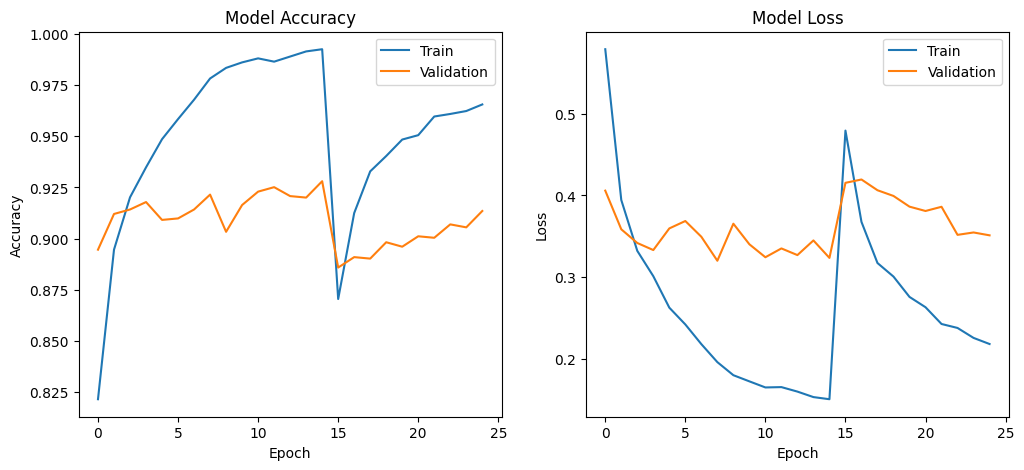

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt


# Data Loading & Augmentation
train_dir = r"C:\Users\Fatma\OneDrive\Desktop\ML_PROJECT\archive (3)\Fruits Classification\TRAIN\train"

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# Class Weights for Imbalance

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))


# Channel Attention

def channel_attention(input_tensor):
    channels = input_tensor.shape[-1]
    shared_layer = models.Sequential([
        layers.GlobalAveragePooling2D(),
        layers.Dense(channels // 8, activation='relu'),
        layers.Dense(channels, activation='sigmoid'),
        layers.Reshape((1, 1, channels))
    ])
    return layers.Multiply()([input_tensor, shared_layer(input_tensor)])

#  Model Architecture

def build_model(num_classes=5):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    inputs = layers.Input(shape=(224, 224, 3))
    x = base_model(inputs)
    x = channel_attention(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model, base_model

model, base_model = build_model()


# Learning Rate Schedule & Compile

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=train_generator.samples // 32 * 5,
    decay_rate=0.9
)

model.compile(
    optimizer=optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.02),
    metrics=['accuracy']
)


# Callbacks

callbacks = [
    ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max"),
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
]


# Initial Training (Frozen Base)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=15,
    callbacks=callbacks,
    class_weight=class_weights
)


# Fine-Tuning (Unfreeze Top 30%)

def unfreeze_model(model, base_model):
    base_model.trainable = True
    fine_tune_at = int(len(base_model.layers) * 0.7)
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-5),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.02),
        metrics=['accuracy']
    )

unfreeze_model(model, base_model)

history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=10,
    callbacks=callbacks,
    class_weight=class_weights
)


#  Save Final Model

model.save("final_fruit_model.keras")


# Plot Accuracy & Loss

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


In [ ]:
# Test Generator and Evaluation

test_dir = r"C:\Users\Fatma\OneDrive\Desktop\ML_PROJECT\archive (3)\Fruits Classification\TEST\test"

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 1500 images belonging to 5 classes.


c:\Users\Fatma\anaconda3\envs\image_classifier_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 814ms/step - accuracy: 0.9009 - loss: 0.3869
Test Accuracy: 0.9127


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [ ]:
from sklearn.metrics import classification_report
import numpy as np


generator = test_generator 

# Predict
y_pred = np.argmax(model.predict(generator), axis=1)
y_true = generator.classes

# Get class names from the generator
subfolders = list(generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=subfolders))


47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 624ms/step
              precision    recall  f1-score   support

       Apple       0.85      0.89      0.87       300
      Banana       0.94      0.91      0.93       300
       Grape       0.94      0.88      0.91       300
       Mango       0.88      0.94      0.91       300
  Strawberry       0.96      0.95      0.95       300

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import joblib  
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from PIL import Image

# Load all models
model_1 = tf.keras.models.load_model("final_fruit_model.keras")           # EfficientNetB0
model_2 = tf.keras.models.load_model("Mennaelgamal.h5")                   # Basic CNN
model_3 = tf.keras.models.load_model("fruit_classifier_model_eyad2.keras") # ResNet50-based
model_4 = tf.keras.models.load_model("fruit_classifier_model_yehia2.h5")   # MLP model
model_6 = joblib.load("archive (3)/svm_fruit_classifier.pkl")             # SVM model (.pkl)

# Class labels
class_names = ['Apple', 'Banana', 'Grapes', 'Mango', 'Strawberry']

# MLP prediction
def predict_with_MLP(img):
    img = img.resize((32, 32))
    img_array = img_to_array(img) / 255.0
    flat_array = img_array.flatten()
    if flat_array.shape[0] < 3172:
        flat_array = np.pad(flat_array, (0, 3172 - flat_array.shape[0]), mode='constant')
    prediction = model_4.predict(np.expand_dims(flat_array, axis=0))[0]
    return prediction

# ResNet50 prediction
def predict_with_resnet50(img):
    img = img.resize((224, 224))
    img_array = img_to_array(img)
    img_array = resnet_preprocess(img_array)
    prediction = model_3.predict(np.expand_dims(img_array, axis=0))[0]
    return prediction

# SVM (.pkl) prediction
def predict_with_svm(img):
    img = img.resize((100, 100))
    img_array = img_to_array(img) / 255.0
    flat_array = img_array.flatten()
    if flat_array.shape[0] < 3072:
        flat_array = np.pad(flat_array, (0, 3072 - flat_array.shape[0]), mode='constant')

    if hasattr(model_6, "predict_proba"):
        prediction = model_6.predict_proba([flat_array])[0]
    else:
        label_index = int(model_6.predict([flat_array])[0])
        prediction = [1 if i == label_index else 0 for i in range(len(class_names))]

    return prediction

# Main function to select the model
def predict_with_selected_model(img, model_choice):
    try:
        if model_choice == "EfficientNetB0 Model":
            img = img.resize((224, 224))
            img_array = img_to_array(img)
            img_array = efficientnet_preprocess(img_array)
            prediction = model_1.predict(np.expand_dims(img_array, axis=0))[0]

        elif model_choice == "CNN basic":
            img = img.resize((224, 224))
            img_array = img_to_array(img)
            img_array = resnet_preprocess(img_array)
            prediction = model_2.predict(np.expand_dims(img_array, axis=0))[0]

        elif model_choice == "ResNet50 model":
            prediction = predict_with_resnet50(img)

        elif model_choice == "MLP model":
            prediction = predict_with_MLP(img)

        elif model_choice == "SVM model":
            prediction = predict_with_svm(img)

        else:
            return "❌ Unknown model selected."

        class_idx = np.argmax(prediction)
        confidence = float(np.max(prediction)) * 100
        label = class_names[class_idx]

        return f"🍉 Predicted: {label} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"❌ Error during prediction: {str(e)}"

# GUI with Gradio
gr.Interface(
    fn=predict_with_selected_model,
    inputs=[
        gr.Image(type="pil", label="Upload Fruit Image"),
        gr.Radio(
            choices=[
                "EfficientNetB0 Model",
                "CNN basic",
                "ResNet50 model",
                "MLP model",
                "SVM model"
            ],
            label="Choose Model",
            value="EfficientNetB0 Model"
        )
    ],
    outputs="text",
    title="Fruit Classifier with Multiple Models",
    description="Upload a fruit image and choose one of five models for classification.",
    allow_flagging="never"  # 👈 This disables the flag button
).launch()



c:\Users\Fatma\anaconda3\envs\image_classifier_env\lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7871
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
